### Problem Statement: Concrete Strength Prediction

<b>Objective:</b>

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

<b>Resources Available:</b>

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. 

<b>Steps and Tasks:</b>

Exploratory data quality report reflecting the following:
1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves.
3. Feature Engineering techniques
<ol>
<li> Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)</li>
<li> Get data model ready and do a train test split.</li> 
<li> Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.</li> 
</ol>

Creating the model and tuning it 
1. Algorithms that you think will be suitable for this project (at least 3 algorithms). Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above.

<b>Attribute Information:</b>
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Input variables:
1. Cement (cement) -- quantitative -- kg in a m3 mixture
2. Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture
3. Fly Ash (ash) -- quantitative -- kg in a m3 mixture
4. Water (water) -- quantitative -- kg in a m3 mixture
5. Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture
6. Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture
7. Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture
8. Age(age) -- quantitative -- Day (1~365)

Output variable (desired target):
9. Concrete compressive strength(strength) -- quantitative -- MPa

GITHUB link: https://github.com/thotaomprakash/PGPAIML-UT-Austin-Projects/blob/master/AIML_Concrete_Strength_Prediction.ipynb

In [187]:
# import the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus
import graphviz

In [213]:
concrete_data = pd.read_csv("concrete.csv")

In [189]:
concrete_data.shape

(1030, 9)

In [190]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [191]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


there are no categorical variables in the data set

In [192]:
concrete_data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no null values in the data set

In [193]:
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##### It appears that Age variable has outliers as it has very high maximum value compared to the 3rd IQR

In [194]:
concrete_data.shape

(1030, 9)

#### Univariat Analysis

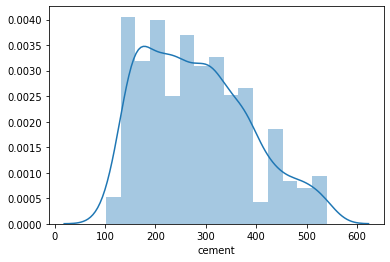

In [195]:
sns.distplot(concrete_data['cement'])

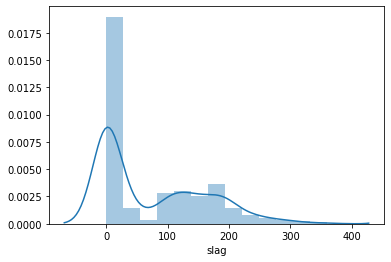

In [196]:
sns.distplot(concrete_data['slag'])

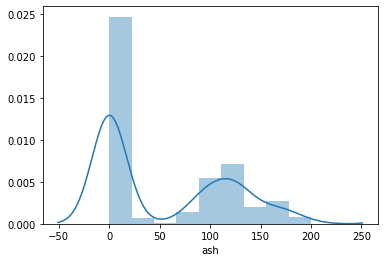

In [197]:
sns.distplot(concrete_data['ash'])

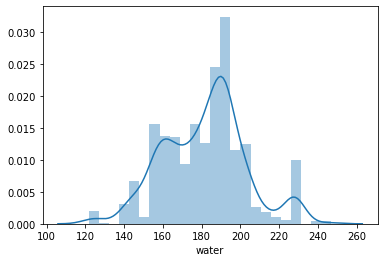

In [198]:
sns.distplot(concrete_data['water'])

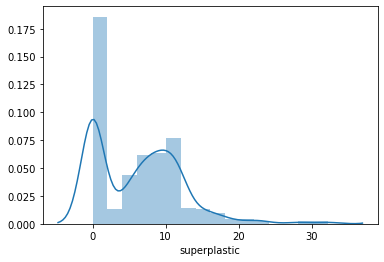

In [199]:
sns.distplot(concrete_data['superplastic'])

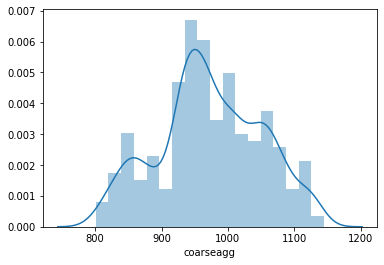

In [200]:
sns.distplot(concrete_data['coarseagg'])

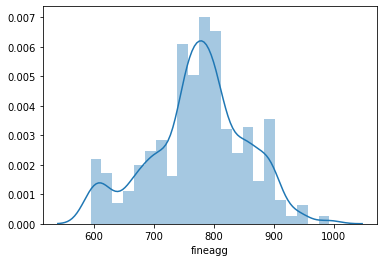

In [201]:
sns.distplot(concrete_data['fineagg'])

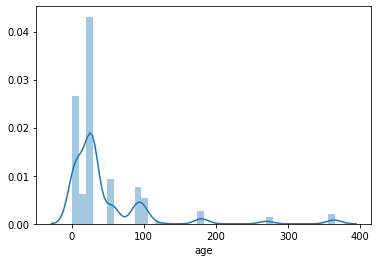

In [202]:
sns.distplot(concrete_data['age'])

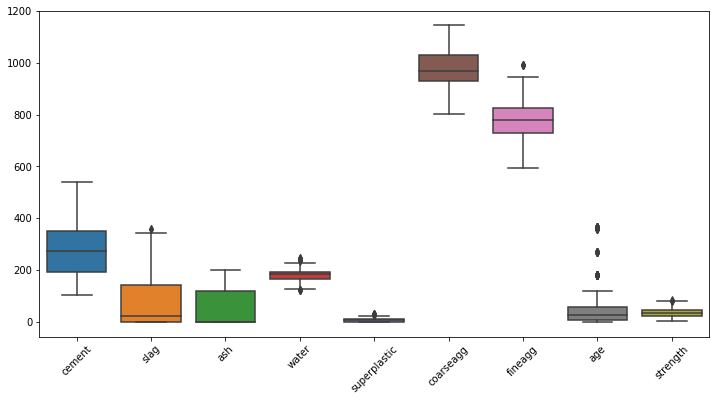

In [203]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=concrete_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

##### Age column appears to be having maximum number of outliers
##### Slag, Water, superplastic, fineagg features have some outliers

In [204]:
# Count outliers
q1= concrete_data.quantile(0.25)
q3= concrete_data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((concrete_data > (q3+1.5*IQR)) | (concrete_data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(concrete_data), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


##### There are different methods that we can apply to for outliers treatment, such as dropping the rows, replacing with the mean vlues. 
##### I chose to ignore the outliers for now

In [205]:
#Bivariat analysis

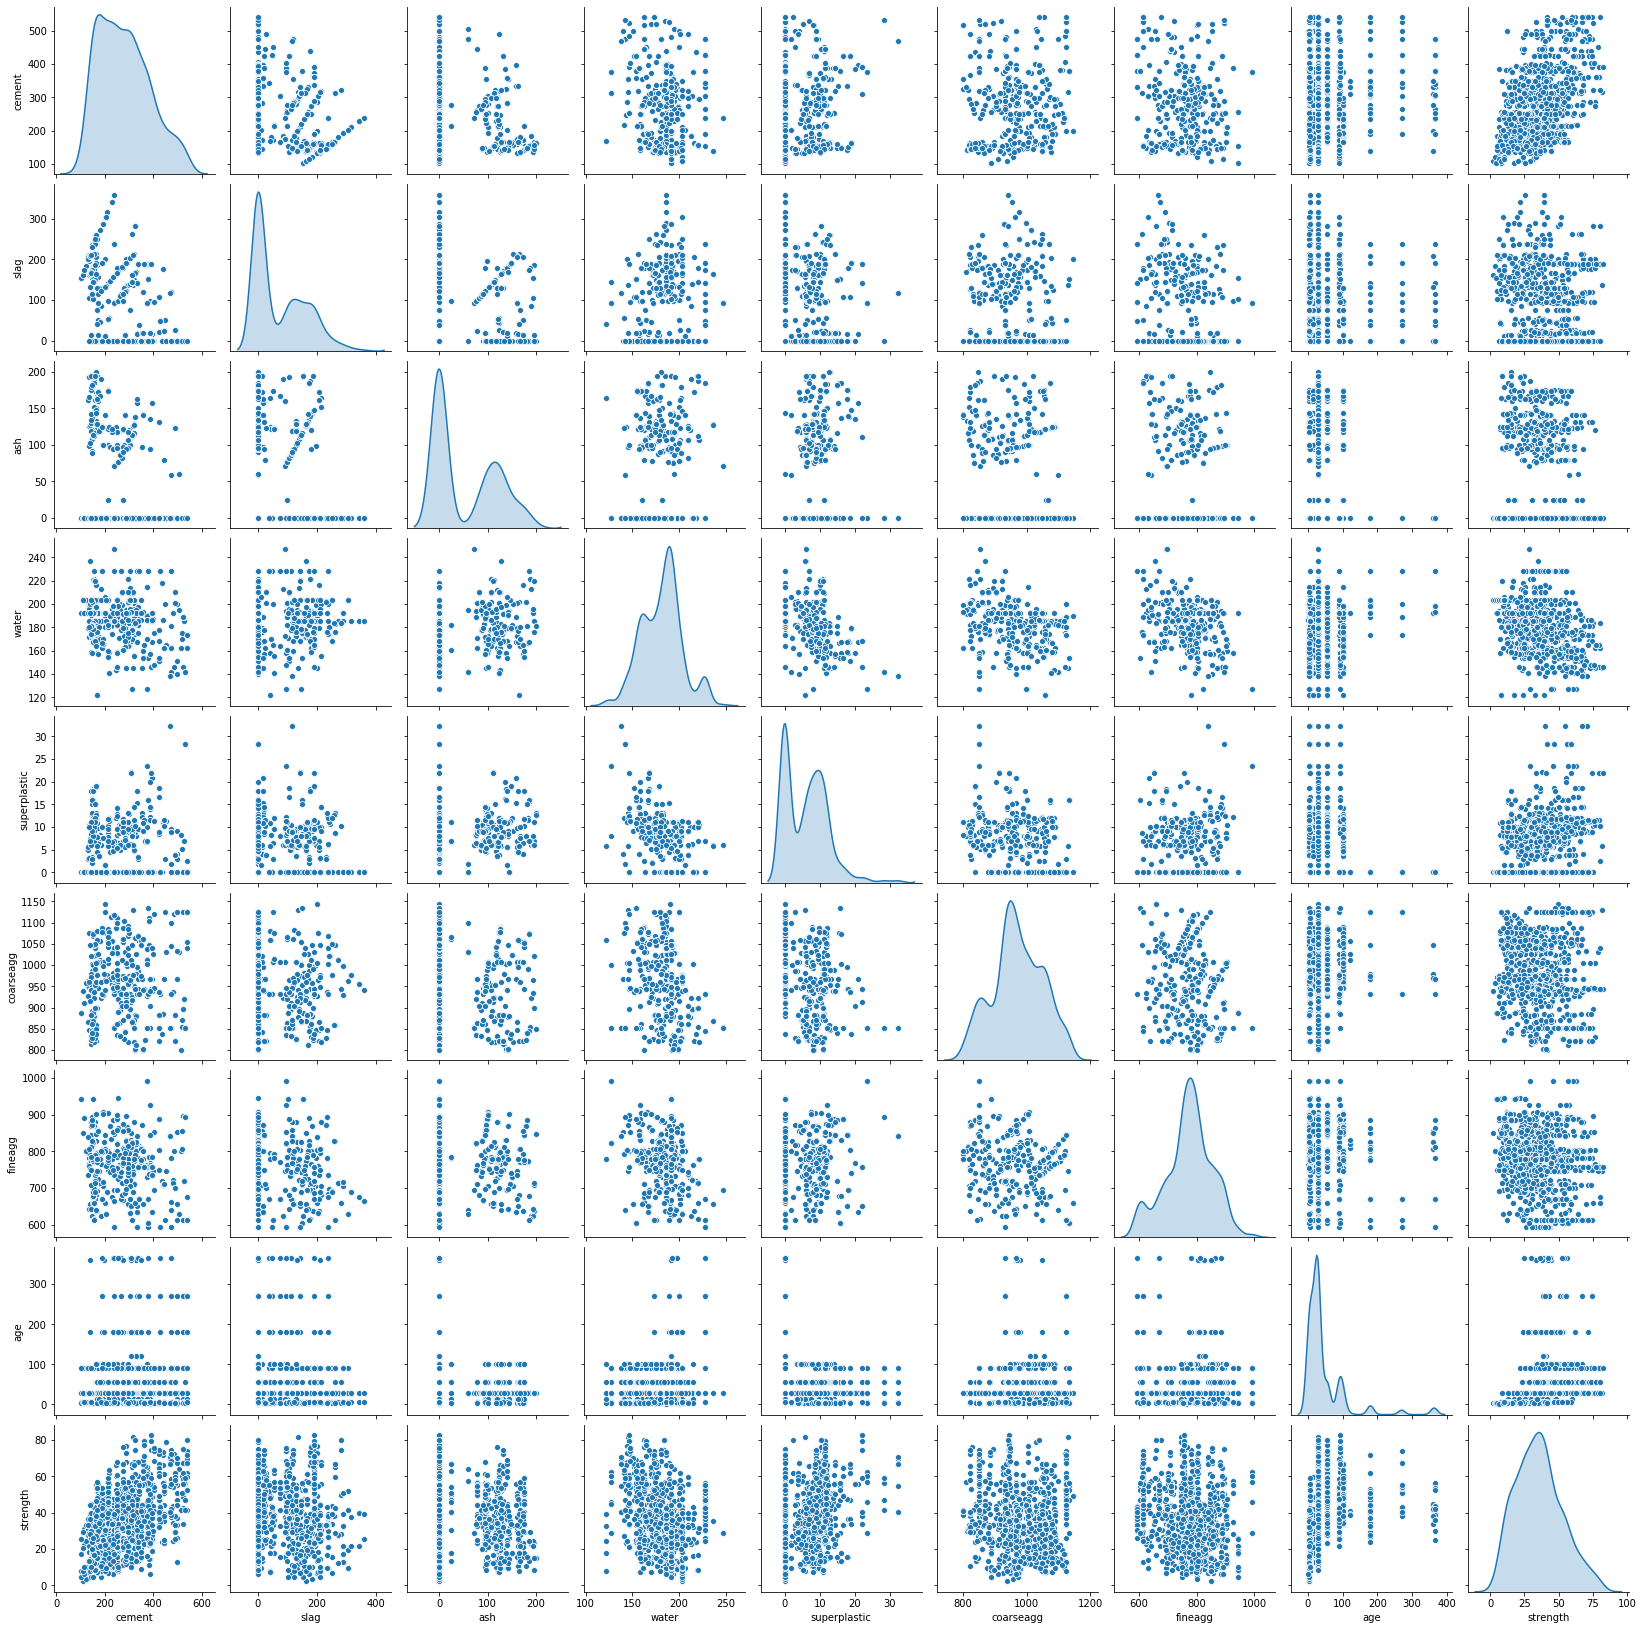

In [206]:
sns.pairplot(concrete_data, diag_kind='kde')

##### Slag and ash has 2 gaussians and is skewed
##### cement and strength have relatively high positive correlation
##### age and strength have positive correlation
##### Age data has long tail which confirms the presence of outliers
##### Strength is normally distributed

In [207]:
concrete_data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


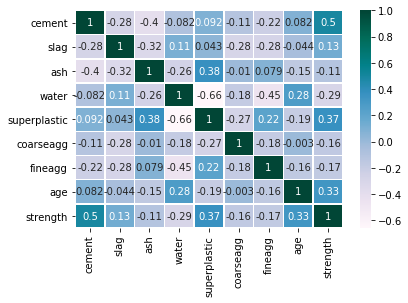

In [208]:
sns.heatmap(concrete_data.corr(), annot=True, linewidths=0.5, linecolor='white', cmap='PuBuGn')

#### Prepare the data for model building

In [214]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Prepre the data for model building
X = concrete_data.drop("strength" , axis=1)
y = concrete_data.pop("strength")
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (1030, 8)
y Shape:  (1030,)


In [215]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)
print(X_train.shape)
print(X_test.shape)

(721, 8)
(309, 8)


#### Creating  and tuning the models

In [225]:
# We will use the following models
# 1. Linear regression 
# 2. Ridge regression
# 3. Lasso
# 4. Decission tree
# 5. Random forest
# 6. Gradient boost regressor

In [226]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

In [227]:
# 1. Linear regression
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)


train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

kfold_results_lr = cross_val_score(lr_model, X, y, cv=kfold, scoring='r2')

# print(kfold_results_lr)
kfold_results_lr_mean = kfold_results_lr.mean()
kfold_results_lr_std = kfold_results_lr.std()

confidence95 = str(round(kfold_results_lr_mean-(1.96*kfold_results_lr_std),3)) + " <-> " + str(round(kfold_results_lr_mean+(1.96*kfold_results_lr_std),3))
#Store the score for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'train_score': train_score, 'test_score': test_score, 'k_fold_mean':kfold_results_lr_mean, 'k_fold_std': kfold_results_lr_std, '95% confidence intervals': confidence95})
resultsDf = resultsDf[['Method', 'train_score','test_score','k_fold_mean','k_fold_std','95% confidence intervals']]
resultsDf

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904


In [228]:
# 2. Ridge regression
ridge_lr_model=Ridge()
ridge_lr_model.fit(X_train, y_train)

ridge_train_score = ridge_lr_model.score(X_train, y_train)
ridge_test_score = ridge_lr_model.score(X_test, y_test)

kfold_results_rlr = cross_val_score(ridge_lr_model, X, y, cv=kfold, scoring='r2')

# print(kfold_results_rlr)
kfold_results_rlr_mean = kfold_results_rlr.mean()
kfold_results_rlr_std = kfold_results_rlr.std()

confidence95 = str(round(kfold_results_rlr_mean-(1.96*kfold_results_rlr_std),3)) + " <-> " + str(round(kfold_results_rlr_mean+(1.96*kfold_results_rlr_std),3))

#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 'train_score': ridge_train_score, 'test_score': ridge_test_score, 'k_fold_mean':kfold_results_rlr_mean, 'k_fold_std': kfold_results_rlr_std, '95% confidence intervals': confidence95})

# tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 'train_score': ridge_train_score, 'test_score': ridge_test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'train_score','test_score','k_fold_mean','k_fold_std','95% confidence intervals']]
resultsDf

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Ridge Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904


In [229]:
# 3. Lasso
lasso_lr_model=Lasso()
lasso_lr_model.fit(X_train, y_train)

lasso_train_score = lasso_lr_model.score(X_train, y_train)
lasso_test_score = lasso_lr_model.score(X_test, y_test)

kfold_results_llr = cross_val_score(lasso_lr_model, X, y, cv=kfold, scoring='r2')

# print(kfold_results_llr)
kfold_results_llr_mean = kfold_results_llr.mean()
kfold_results_llr_std = kfold_results_llr.std()

confidence95 = str(round(kfold_results_llr_mean-(1.96*kfold_results_llr_std),3)) + " <-> " + str(round(kfold_results_llr_mean+(1.96*kfold_results_llr_std),3))

#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso Regression'], 'train_score': lasso_train_score, 'test_score': lasso_test_score, 'k_fold_mean':kfold_results_llr_mean, 'k_fold_std': kfold_results_llr_std, '95% confidence intervals': confidence95})

# tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 'train_score': ridge_train_score, 'test_score': ridge_test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'train_score','test_score','k_fold_mean','k_fold_std','95% confidence intervals']]
resultsDf

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Ridge Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Lasso Regression,0.610645,0.622884,0.545863,0.181998,0.189 <-> 0.903


In [230]:
# 4. Decision tree
from sklearn.tree import DecisionTreeRegressor
dtr_model=DecisionTreeRegressor(max_depth=4)

dtr_model.fit(X_train, y_train)

dtr_train_score = dtr_model.score(X_train, y_train)
dtr_test_score = dtr_model.score(X_test, y_test)

kfold_results_dtr = cross_val_score(dtr_model, X, y, cv=kfold, scoring='r2')

# print(kfold_results_dtr)
kfold_results_dtr_mean = kfold_results_dtr.mean()
kfold_results_dtr_std = kfold_results_dtr.std()

confidence95 = str(round(kfold_results_dtr_mean-(1.96*kfold_results_dtr_std),3)) + " <-> " + str(round(kfold_results_dtr_mean+(1.96*kfold_results_dtr_std),3))

#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree Regression'], 'train_score': dtr_train_score, 'test_score': dtr_test_score, 'k_fold_mean':kfold_results_dtr_mean, 'k_fold_std': kfold_results_dtr_std, '95% confidence intervals': confidence95})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'train_score','test_score','k_fold_mean','k_fold_std','95% confidence intervals']]
resultsDf

# sns.distplot(kfold_results_dtr)

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Ridge Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Lasso Regression,0.610645,0.622884,0.545863,0.181998,0.189 <-> 0.903
0,Decision Tree Regression,0.739648,0.666066,0.638928,0.163221,0.319 <-> 0.959


In [231]:
# 5. Random forest
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
rf_model=RandomForestRegressor(max_depth=4)

rf_model.fit(X_train, y_train)

rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

kfold_results_rfr = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')

# print(kfold_results_rfr)
kfold_results_rfr_mean = kfold_results_rfr.mean()
kfold_results_rfr_std = kfold_results_rfr.std()

confidence95 = str(round(kfold_results_rfr_mean-(1.96*kfold_results_rfr_std),3)) + " <-> " + str(round(kfold_results_rfr_mean+(1.96*kfold_results_rfr_std),3))

#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regression'], 'train_score': rf_train_score, 'test_score': rf_test_score, 'k_fold_mean':kfold_results_rfr_mean, 'k_fold_std': kfold_results_rfr_std, '95% confidence intervals': confidence95})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'train_score','test_score','k_fold_mean','k_fold_std','95% confidence intervals']]
resultsDf

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Ridge Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Lasso Regression,0.610645,0.622884,0.545863,0.181998,0.189 <-> 0.903
0,Decision Tree Regression,0.739648,0.666066,0.638928,0.163221,0.319 <-> 0.959
0,Random Forest Regression,0.830523,0.778104,0.739047,0.100685,0.542 <-> 0.936


In [232]:
# 6. Gradiant Boost Regressio
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

gb_model.fit(X_train, y_train)

gb_train_score = gb_model.score(X_train, y_train)
gb_test_score = gb_model.score(X_test, y_test)

kfold_results_gb = cross_val_score(gb_model, X, y, cv=kfold, scoring='r2')

# print(kfold_results_gb)
kfold_results_gb_mean = kfold_results_gb.mean()
kfold_results_gb_std = kfold_results_gb.std()

confidence95 = str(round(kfold_results_gb_mean-(1.96*kfold_results_gb_std),3)) + " <-> " + str(round(kfold_results_gb_mean+(1.96*kfold_results_gb_std),3))

#Store the score for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regression'], 'train_score': gb_train_score, 'test_score': gb_test_score, 'k_fold_mean':kfold_results_gb_mean, 'k_fold_std': kfold_results_gb_std, '95% confidence intervals': confidence95})

# tempResultsDf = pd.DataFrame({'Method':['Ridge Regression'], 'train_score': ridge_train_score, 'test_score': ridge_test_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'train_score','test_score','k_fold_mean','k_fold_std','95% confidence intervals']]
resultsDf

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Ridge Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
0,Lasso Regression,0.610645,0.622884,0.545863,0.181998,0.189 <-> 0.903
0,Decision Tree Regression,0.739648,0.666066,0.638928,0.163221,0.319 <-> 0.959
0,Random Forest Regression,0.830523,0.778104,0.739047,0.100685,0.542 <-> 0.936
0,Gradient Boost Regression,0.950424,0.916864,0.894370,0.055692,0.785 <-> 1.004


In [233]:
resultsDf.reset_index(drop=True)

,Method,train_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
1,Ridge Regression,0.610861,0.622879,0.546328,0.182668,0.188 <-> 0.904
2,Lasso Regression,0.610645,0.622884,0.545863,0.181998,0.189 <-> 0.903
3,Decision Tree Regression,0.739648,0.666066,0.638928,0.163221,0.319 <-> 0.959
4,Random Forest Regression,0.830523,0.778104,0.739047,0.100685,0.542 <-> 0.936
5,Gradient Boost Regression,0.950424,0.916864,0.894370,0.055692,0.785 <-> 1.004


###### Gradient Boost Regresser gives the best results for this data set 

We will use hyper parameter tunig using RandomSearchCV on the Gradient Boosting model

In [173]:
# check the parameters for the Gradient Boost model that we built
gb_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [174]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
}

In [176]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)

In [177]:
rs.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [178]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")

Mean training score: 0.9525970725908764
Mean validation score: 0.9131067871975084
Validation standard deviation: 0.024019853747044524
95% confidence interval: 0.866 <-> 0.96
Best parameters: {'max_depth': 5, 'learning_rate': 0.15, 'criterion': 'mse'}
Test score: 0.9352053353951871


We will use Hyper parameter tunig using GridSearchCV on the Random Forest to find the best model.

In [93]:
# check the parameters for the Random Forest model that we built
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [241]:
param_grid={
    'criterion': ['mse', 'mae'], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', 'auto'], 
    'max_leaf_nodes': list(range(2, 5))}

In [243]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf_model, param_grid, verbose=2, cv = 10)

In [244]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.3s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=2, max_features=sqrt, max_leaf_no

[CV]  criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4, total=   0.7s
[CV] criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4, total=   0.3s
[CV] criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4, total=   0.5s
[CV] criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4, total=   0.4s
[CV] criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=2, max_features=auto, max_leaf_nodes=4, total=   0.3s
[CV] criterion=mse, max_depth=3, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=3, max_features=sqrt, max_leaf_no

[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=3, total=   0.4s
[CV] criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=3, total=   0.4s
[CV] criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=3, total=   0.4s
[CV] criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4, total=   0.4s
[CV] criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4, total=   0.4s
[CV] criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4, total=   0.3s
[CV] criterion=mse, max_depth=3, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mse, max_depth=3, max_features=auto, max_leaf_no

[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3, total=   0.3s
[CV] criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3, total=   0.3s
[CV] criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=auto, max_leaf_nodes=3 .
[CV]  criterion=mse, max_depth=4, max_features=auto, max_leaf_no

[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2, total=   0.3s
[CV] criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2, total=   0.3s
[CV] criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2, total=   0.4s
[CV] criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2, total=   0.3s
[CV] criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2, total=   0.3s
[CV] criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2, total=   0.3s
[CV] criterion=mse, max_depth=5, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mse, max_depth=5, max_features=auto, max_leaf_no

[CV]  criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=2, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=2, max_features=auto, max_leaf_nodes=2, total=   1.1s
[CV] criterion=mae, max_depth=2, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=2, max_features=auto, max_leaf_nodes=2, total=   1.3s
[CV] criterion=mae, max_depth=2, max_features=auto, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=2, max_features=auto, max_leaf_no

[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4, total=   0.7s
[CV] criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4, total=   0.6s
[CV] criterion=mae, max_depth=3, max_features=sqrt, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=3, max_features=sqrt, max_leaf_no

[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3, total=   0.7s
[CV] criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=4, max_features=sqrt, max_leaf_no

[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2, total=   0.5s
[CV] criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2, total=   0.6s
[CV] criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2, total=   0.7s
[CV] criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2, total=   0.6s
[CV] criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2 .
[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=2, total=   0.6s
[CV] criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=3, total=   0.6s
[CV] criterion=mae, max_depth=5, max_features=sqrt, max_leaf_nodes=3 .
[CV]  criterion=mae, max_depth=5, max_features=sqrt, max_leaf_no

[CV]  criterion=mae, max_depth=5, max_features=auto, max_leaf_nodes=4, total=   1.8s
[CV] criterion=mae, max_depth=5, max_features=auto, max_leaf_nodes=4 .
[CV]  criterion=mae, max_depth=5, max_features=auto, max_leaf_nodes=4, total=   1.6s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=4,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [245]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 4}

In [246]:
gs.cv_results_['params']

[{'criterion': 'mse',
  'max_depth': 2,
  'max_features': 'sqrt',
  'max_leaf_nodes': 2},
 {'criterion': 'mse',
  'max_depth': 2,
  'max_features': 'sqrt',
  'max_leaf_nodes': 3},
 {'criterion': 'mse',
  'max_depth': 2,
  'max_features': 'sqrt',
  'max_leaf_nodes': 4},
 {'criterion': 'mse',
  'max_depth': 2,
  'max_features': 'auto',
  'max_leaf_nodes': 2},
 {'criterion': 'mse',
  'max_depth': 2,
  'max_features': 'auto',
  'max_leaf_nodes': 3},
 {'criterion': 'mse',
  'max_depth': 2,
  'max_features': 'auto',
  'max_leaf_nodes': 4},
 {'criterion': 'mse',
  'max_depth': 3,
  'max_features': 'sqrt',
  'max_leaf_nodes': 2},
 {'criterion': 'mse',
  'max_depth': 3,
  'max_features': 'sqrt',
  'max_leaf_nodes': 3},
 {'criterion': 'mse',
  'max_depth': 3,
  'max_features': 'sqrt',
  'max_leaf_nodes': 4},
 {'criterion': 'mse',
  'max_depth': 3,
  'max_features': 'auto',
  'max_leaf_nodes': 2},
 {'criterion': 'mse',
  'max_depth': 3,
  'max_features': 'auto',
  'max_leaf_nodes': 3},
 {'criteri

In [247]:
gs.cv_results_['mean_test_score']

array([0.26614096, 0.40770251, 0.45787984, 0.31925575, 0.50465268,
       0.5611223 , 0.256973  , 0.40217005, 0.48873572, 0.31632054,
       0.50179567, 0.57424289, 0.25581121, 0.40393267, 0.485038  ,
       0.31207102, 0.50279365, 0.57504581, 0.26194325, 0.3987912 ,
       0.48279865, 0.31511167, 0.50434895, 0.57171204, 0.23824533,
       0.40421821, 0.45082768, 0.24148562, 0.46742242, 0.55612585,
       0.23602419, 0.39850818, 0.48775117, 0.23781285, 0.46903985,
       0.55924679, 0.23669515, 0.41062385, 0.49104677, 0.24104081,
       0.46282707, 0.5591576 , 0.23530187, 0.40500938, 0.48633787,
       0.23830738, 0.46680936, 0.55942104])

In [248]:
gs.score(X_test, y_test)

0.5987458193760552

In [249]:
gs.score(X_train, y_train)

0.6100050545952621

### Conclusion
<ol>
    <li> The best model is Gradient boosting with Randomized Search CV technique</li>
    <li>Using the above model, we can predict the strength accurately between 86% to 96% with 95% confidence</li>
</ol>